# Gearbox Run-In Hand Calcs

## Top Mount Plate Bolts
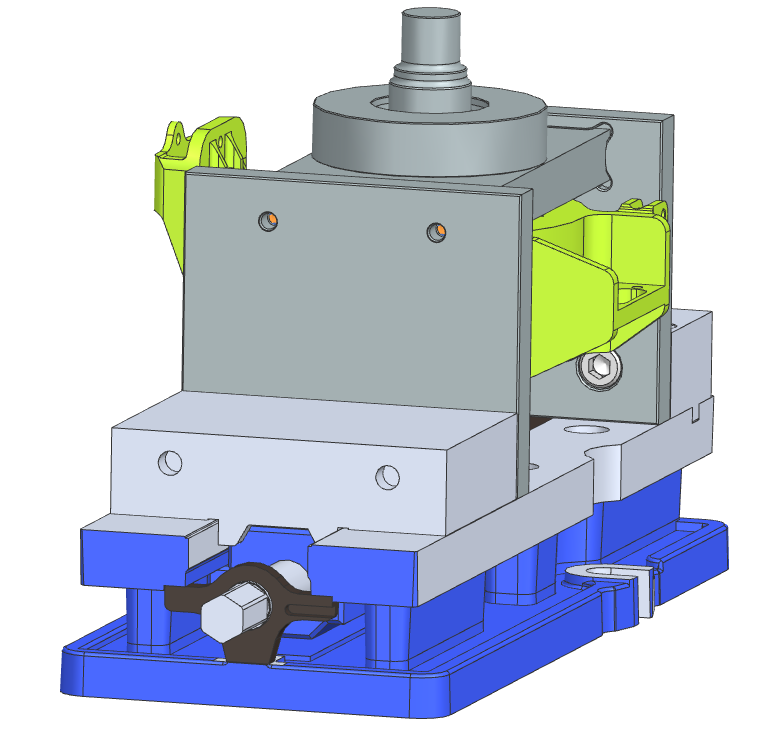

We ideally want the engagement length to be long enough such that the screw breaks before the threads strip so:\
[https://www.nord-lock.com/insights/bolting-tips/2015/the-experts-thread-engagement-in-a-tapped-hole/](https://www.nord-lock.com/insights/bolting-tips/2015/the-experts-thread-engagement-in-a-tapped-hole/)


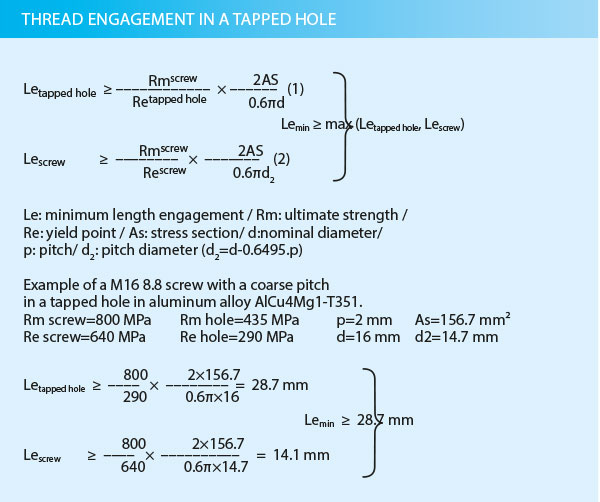

### Calcs:
6061 ([MMPDS 6061-T6 $F_{tu}$ L](https://wikis.mit.edu/confluence/display/FSAEMechE/Aluminium)):

$$R_{e}^{6061} = 41 ksi = 282.685 MPa$$

Grade 8 Steel ([Machinery's Handbook Page 1534](https://wikis.mit.edu/confluence/download/attachments/185534980/Machinerys%20Handbook%2029th%20Edition.pdf?version=1&modificationDate=1636256412000&api=v2)):
$$R_{e}^{Grade 8} = 130 \cdot 10^3 psi = 896.318448 MPa$$
$$R_{m}^{Grade 8} = 150 \cdot 10^3 psi = 1034.21359 MPa$$

Stress Area ([Machinery's Handbook Page 1845](https://wikis.mit.edu/confluence/download/attachments/185534980/Machinerys%20Handbook%2029th%20Edition.pdf?version=1&modificationDate=1636256412000&api=v2)):
$$A_s = 0.0364 in^2 = 23.483824 mm^2$$

Diameters ([Machinery's Handbook Page 1818 $\frac{1}{4}-28$ UNF Class 2A](https://wikis.mit.edu/confluence/download/attachments/185534980/Machinerys%20Handbook%2029th%20Edition.pdf?version=1&modificationDate=1636256412000&api=v2)):
$$d (\text{Min Major Diameter}) = 0.2425 in = 6.1595 mm$$
$$d_2 (\text{Min Pitch Diameter}) = 0.2225 in = 5.6515 mm$$

So,
$$Le_{Hole} \leq \frac{R_{m}^{Screw}}{R_{e}^{Hole}} \cdot \frac{2 \cdot A_s}{0.6 \cdot pi \cdot d}$$

$$Le_{Screw} \leq \frac{R_{m}^{Screw}}{R_{e}^{Screw}} \cdot \frac{2 \cdot A_s}{0.6 \cdot pi \cdot d_2}$$

With givens,
$$Le_{Hole} \leq \frac{1034.21359 MPa}{282.685 MPa} \cdot \frac{2 \cdot 23.483824 mm^2}{0.6 \cdot \pi \cdot 6.1595 mm}$$

$$Le_{Screw} \leq \frac{1034.21359 MPa}{896.318448 MPa} \cdot \frac{2 \cdot 23.483824 mm^2}{0.6 \cdot \pi \cdot 5.6515 mm}$$

In [11]:
import numpy as np

L_e_Hole = (1034.21359 / 282.685) *  ((2 * 23.483824) / (0.6 * np.pi * 6.1595))
L_e_Screw = (1034.21359 / 896.318448) *  ((2 * 23.483824) / (0.6 * np.pi * 5.6515))

print("L_e_Hole = {} mm".format(L_e_Hole))
print("L_e_Screw = {} mm".format(L_e_Screw))

L_e_Hole = 14.799931519855754 mm
L_e_Screw = 5.087235735101489 mm


So we should aim for around 14.8mm of thread engagement with the bolt.

From this, we can size our bolt torque value based on a bolt torque chart.

Taking the lowest torque coefficient value under the assumption that the aluminum to yellow zinc chromate coefficient of friction is low: [https://www.fastenal.com/content/merch_rules/images/fcom/content-library/Torque-Tension%20Reference%20Guide.pdf](https://www.fastenal.com/content/merch_rules/images/fcom/content-library/Torque-Tension%20Reference%20Guide.pdf)

$$123 \text{ inlb} = \frac{123}{12} \text{ lbft} = 10.25 \text{ lbft} = 13.897134 \text{ Nm}$$

## Bearing Mount Plate Bolts
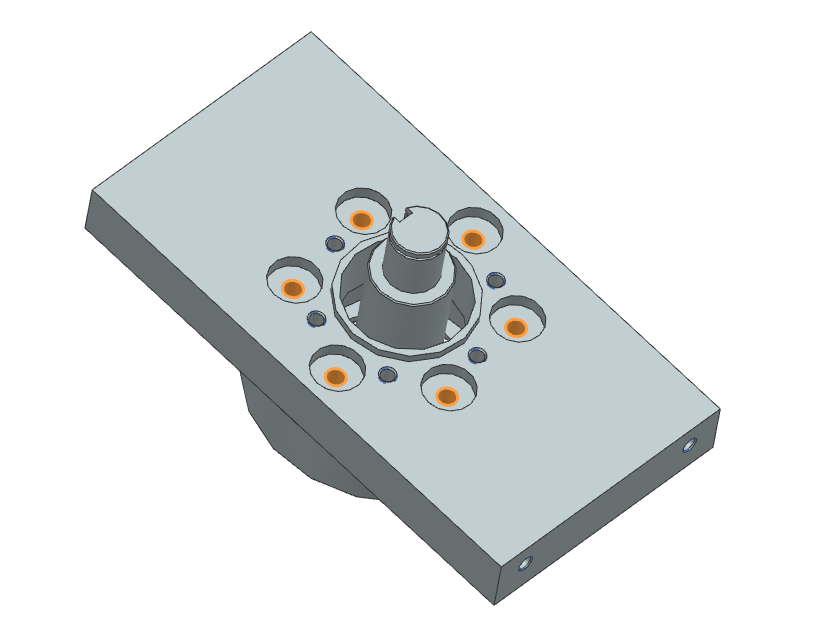

See above:
$$10.25 \text{ lbft} = 13.897134 \text{ Nm}$$

## Upright Mounting Bolts
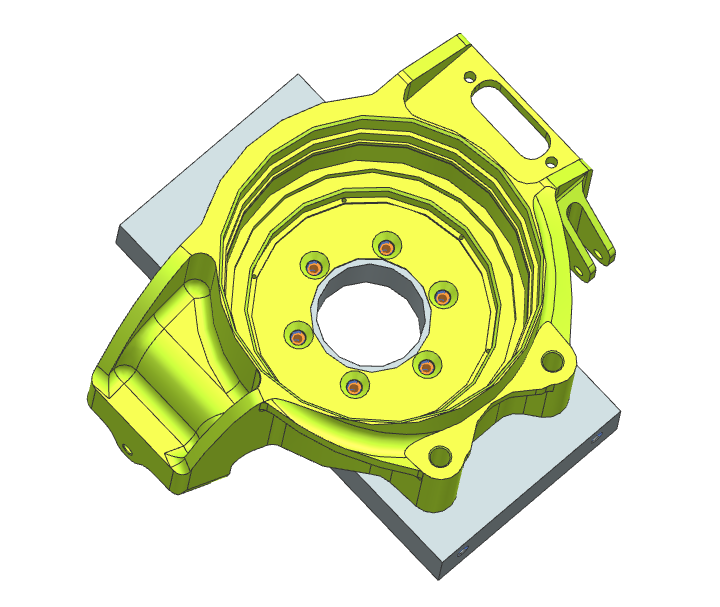

A similar assumption is made about the aluminum to black oxide coefficient of friction.

See above:
$$10.25 \text{ lbft} = 13.897134 \text{ Nm}$$

## Vice Deflection
Abstraction:
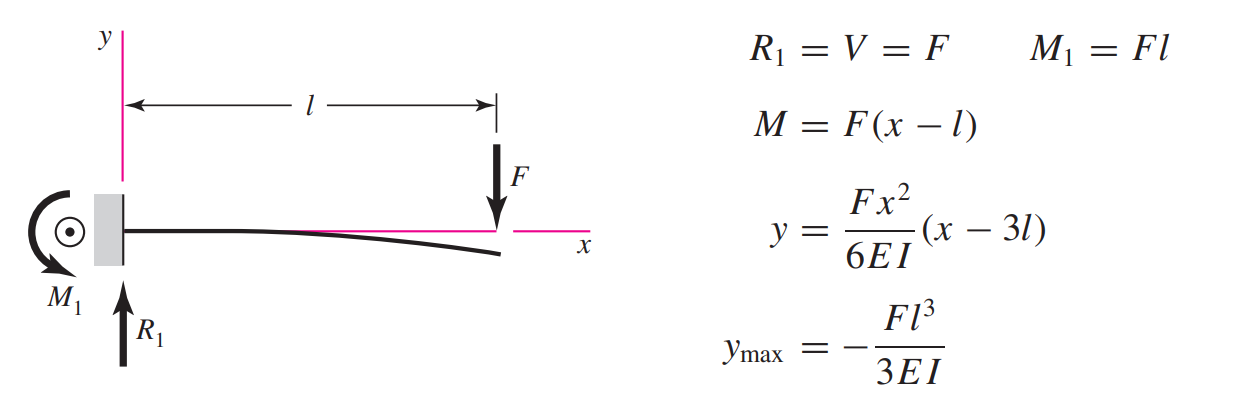

### Calcs:
Assume:
$$b = 6in = 0.1524m$$
$$h = 0.7in = 0.01778m$$

$$I = \frac{b \cdot h^3}{12} = \frac{0.1524m * (0.01778m)^3}{12}$$

6061 ([MMPDS 6061-T6 $F_{tu}$ L](https://wikis.mit.edu/confluence/display/FSAEMechE/Aluminium)):
$$E = 9.9 \cdot 10^3 ksi = 6.8258 \cdot 10^{10} \frac{N}{m^2}$$

Max Deflection:
$$0.001in = 2.54 \cdot 10^{-5}m$$

Length:
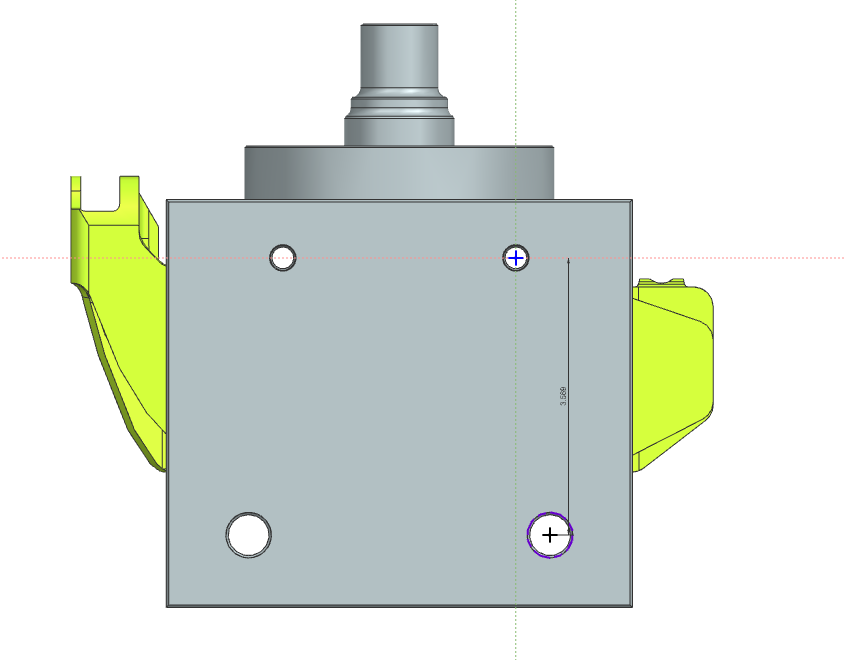
$$l = 3.569in = 0.0906526m$$

Equation:
$$F = -\frac{3 \cdot y_{max} \cdot E \cdot I}{l^3}$$

With givens,
$$F = -\frac{3 \cdot -2.54 \cdot 10^{-5} \cdot 6.8258 \cdot 10^{10} \cdot \frac{0.1524m * (0.01778m)^3}{12}}{0.0906526m^3}$$

In [16]:
I = (0.1524 * 0.01778**3) / 12
F = -(3 * -2.54 * 10**(-5) * 6.8258 * 10**(10) * I) / (0.0906526**3)

print("F = {} N".format(F))

F = 498.387025150564 N


Max Clamping Force:
$$498.387025150564 N = 112.04186076308877773 lbf$$

With the vice table:
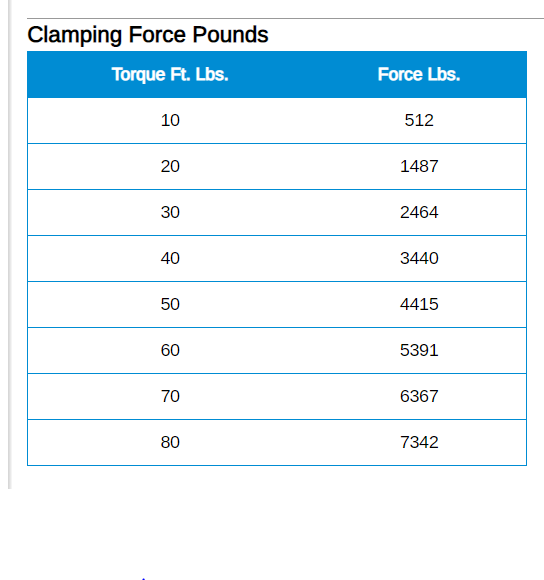

$$m = \frac{y_2 - y_1}{x_2 - x_1}$$
$$m = \frac{1487 lbf - 512 lbf}{20 ftlb - 10 ftlb}$$

$$\tau = \frac{F}{m}$$
$$\tau = \frac{112.04186076308877773 lbf}{frac{1487 lbf - 512 lbf}{20 ftlb - 10 ftlb}} 

In [17]:
m = (1487 - 512) / (20 - 10)
tau = 112.04186076308877773 / m

print("tau = {} ftlb".format(tau))

tau = 1.1491472898778337 ftlb


So the vice should be torqued to:
$$1.1491472898778337 ftlb = 1.5580345208566697135 Nm$$